# Numerical derivatives: finite differences

If we cannot calculate derivative of some function analyticaly we need some approximation $\rightarrow$ numerical approach
## Simple approach
$f'(x) \sim D(f) = \frac{f(x+h)-f(x)}{h}$ - one-seded numerical derivative

$\frac{f(x+h)-f(x)}{h}=\frac{f(x)+f'(x)\cdot h+O(h^2)-f(x)}{h}=f'(x)+O(h)$

We can costruct more accurate approximation:

$\frac{f(x+h)-f(x-h)}{2h}=\frac{f(x)+f'(x)\cdot h+f''(x)\cdot h^2/2+O(h^3)-f(x)+f'(x)\cdot h-f''(x)\cdot h^2/2+O(h^3)}{2h}=f'(x)+O(h^2)$

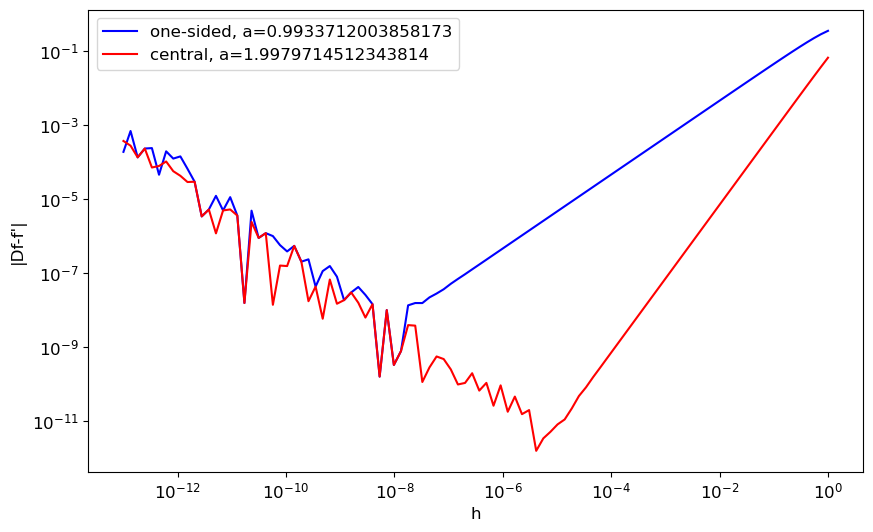

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
plt.rcParams.update({'font.size': 12})


def der_forward(f, x, h):
    numerator = f(x+h)-f(x)
    denominator = h
    return numerator/denominator


def der_central(f, x, h):
    numerator = f(x+h)-f(x-h)
    denominator = 2*h
    return numerator/denominator


def f(x): return np.sin(x)
def df(x): return np.cos(x)
x = 2

#def f(x): return x**11
#def df(x): return 11*x**10
#x=1.2




h_arr = np.logspace(-13, 0, num=100)

df_forward_arr = np.array([])
df_central_arr = np.array([])

for h in h_arr:
    df_forward_arr = np.append(
        df_forward_arr, np.abs(der_forward(f, x, h)-df(x)))
    df_central_arr = np.append(
        df_central_arr, np.abs(der_central(f, x, h)-df(x)))

index_1 = h_arr > 1e-6
index_2 = h_arr > 1e-4

p_forward = np.polyfit(
    np.log10(h_arr[index_1]), np.log10(df_forward_arr[index_1]), 1)
p_central = np.polyfit(
    np.log10(h_arr[index_2]), np.log10(df_central_arr[index_2]), 1)

plt.figure(figsize=(10, 6))
plt.loglog(h_arr, df_forward_arr, 'b-',
           label='one-sided, a={}'.format(p_forward[0]))
plt.loglog(h_arr, df_central_arr, 'r-',
           label='central, a={}'.format(p_central[0]))
plt.xlabel('h')
plt.ylabel('|Df-f\'|')
plt.legend()

## Erorrs come from:
1. $x_2 \ne x_1 + h $, but $x_2 = (x_1 + h)_m$ Self-agreement: `dx = x_2 - x_1`
2. $f_m(x)\ne f(x)$, $|f_m(x) - f(x)|<\epsilon_f |f(x)|$

In [7]:
h = np.array([1e-15, 1e-14, 1e-10])
((1.0 + h) - 1.0)/h - 1.0

array([ 1.10223025e-01, -7.99277837e-04,  8.27403710e-08])

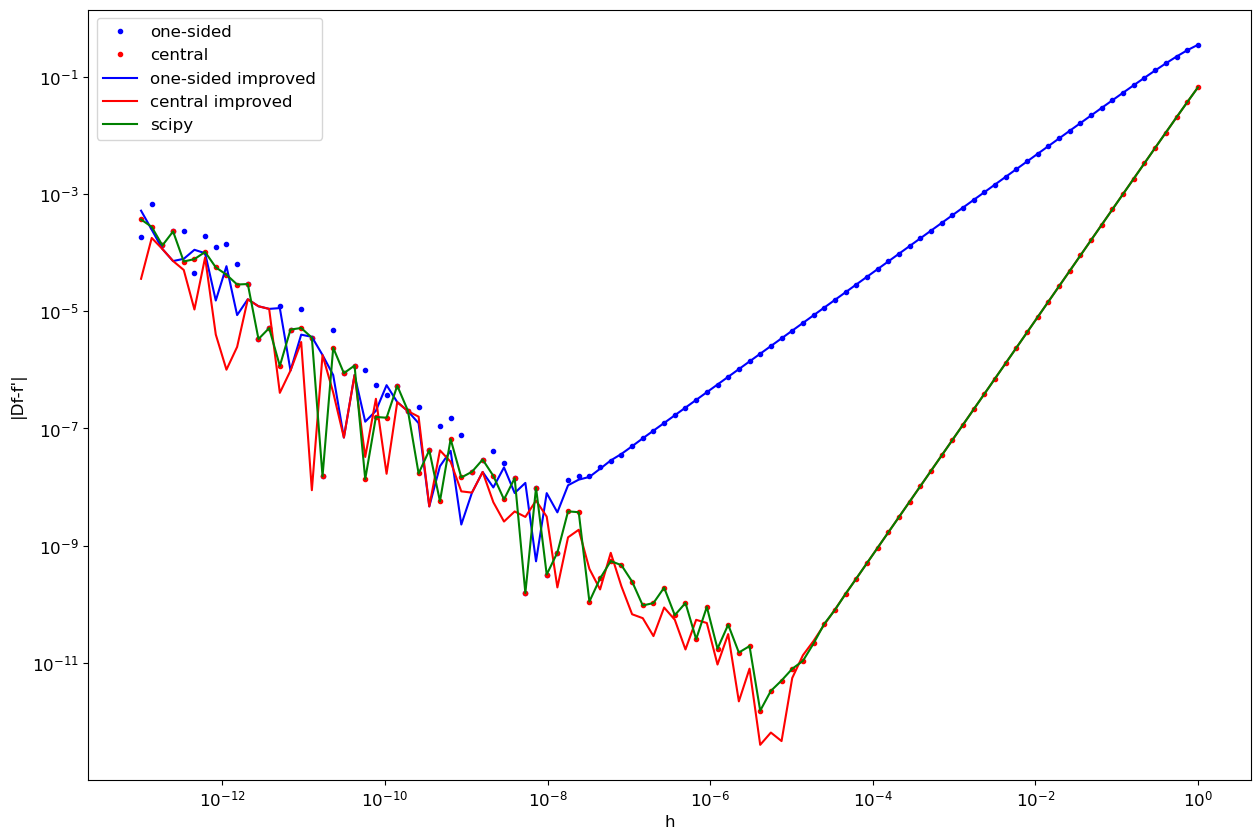

In [20]:
def der_forward_corr(f, x, h):
    x2 = x+h
    x1 = x
    dx = x2-x1
    numerator = f(x2)-f(x1)
    denominator = dx
    return numerator/denominator


def der_central_corr(f, x, h):
    x2 = x+h
    x1 = x-h
    dx = x2-x1
    numerator = f(x2)-f(x1)
    denominator = dx
    return numerator/denominator


df_forward_arr_c = np.array([])
df_central_arr_c = np.array([])
df_scipy = np.array([])

for h in h_arr:
    df_forward_arr_c = np.append(
        df_forward_arr_c, np.abs(der_forward_corr(f, x, h)-df(x)))
    df_central_arr_c = np.append(
        df_central_arr_c, np.abs(der_central_corr(f, x, h)-df(x)))
    df_scipy = np.append(df_scipy, np.abs(derivative(f, x, dx=h)-df(x)))

plt.figure(figsize=(15, 10))
plt.loglog(h_arr, df_forward_arr, 'b.', label='one-sided')
plt.loglog(h_arr, df_central_arr, 'r.', label='central')
plt.loglog(h_arr, df_forward_arr_c, 'b-', label='one-sided improved')
plt.loglog(h_arr, df_central_arr_c, 'r-', label='central improved')
plt.loglog(h_arr, df_scipy, 'g', label='scipy')
plt.xlabel('h')
plt.ylabel('|Df-f\'|')
plt.legend()

## Optimal step




Roundof error of the numerical derivative:

$\epsilon_r \sim \epsilon_f |\frac{f(x)}{h}|$

if relative accuracy of $f(x)$ is $\epsilon_f$

Total error:

$\epsilon_t = \epsilon_r+\epsilon_f \sim \epsilon_f |\frac{f(x)}{h}| + f''(x)h \leftarrow$ linearization error

Minimum of the error: $d\epsilon_t/dh=0$

$\rightarrow h_{opt} \sim \sqrt{\frac{\epsilon_f f}{f''}} \sim \sqrt{\epsilon_f} \sim 10^{-8}$

$\epsilon_{min} \sim \sqrt{\epsilon_f} \sim 10^{-8}$

For the central scheme:

$\rightarrow h_{opt} \sim  \epsilon_f^{1/3} \sim 10^{-6}$

$\epsilon_{min} \sim \epsilon_f{2/3} \sim 10^{-12}$



**More accurate**:

$\epsilon_t=\left|f'(x)-\frac{\hat{f}(x+h)-\hat{f}(x)}{h}\right|=\left|f'(x)-\left(\frac{f(x+h)-f(x)}{h}+\frac{\epsilon_f(x+h)-\epsilon_f(x)}{h}\right)\right|\le \color{red}{\left|f'(x)-\frac{f(x+h)-f(x)}{h}\right|}+\left|\frac{\epsilon_f(x+h)-\epsilon_f(x)}{h}\right|\le \color{red}{\frac{f'''(x)}{12}h^2}+\frac{2\epsilon_f}{h}$

$d\epsilon_t/dh \sim hf'''(x)/6-\epsilon_f/h^2=0$

$\rightarrow h_{opt}\sim (6\epsilon_f/f'''(x))^{1/3}\sim \epsilon_f^{1/3}$

## High order schemes

$f'(x_0)\sim g\left(f(x_0),f(x_0+h),f(x_0+2h)\right)+O(h^2)$

$f'(x_0)=\frac{af(x_0)+bf(x_0+h)+cf(x_0+2h)}{h}+O(h^2)$

$af(x_0)+bf(x_0+h)+cf(x_0+2h)\sim af(x_0)+b\left(f(x_0)+f'(x_0)h+f'h^2/2\right)+c\left(f(x_0)+f'(x_0)2h+f'4h^2/2\right)$

 $\rightarrow \begin{cases} a+b+c=0 \\ b+2c=1 \\ b+4c=0 \end{cases}$

*HW..*

## Richardson extrapolation

 $Z(h)=Z_*+Kh^\alpha$

1. can only compute $Z(h)$ for various values of $h$

2. are interested in the limiting value $Z_*=Z(0)$

3. $\alpha$ is known

for some $q\ne 1$

 $\begin{cases} Z(h)=Z_*+Kh^\alpha \\
Z(\frac{h}{q})=Z_*+K\left(\frac{h}{q}\right)^\alpha\end{cases}$

$Z_*=\frac{q^\alpha Z(\frac{h}{q})-Z(h)}{q^\alpha-1}$

### Algorithm for numerical derivatives:

$Z_h=\frac{f(x+h)-f(x-h)}{2h} \sim f'(x)+\frac{f'''(x)}{12}h^2+...=f'(x)+K_2h^2+K_4h^4+...$

$Z_h^{(2)}=\frac{q^2 Z_{h/q}-Z_h}{q^2-1} \sim f'(x) + O(h^4)$

$Z_h^{(4)}=\frac{q^4 Z^{(2)}_{h/q}-Z^{(2)}_h}{q^4-1} \sim f'(x) + O(h^6)$

and so on.

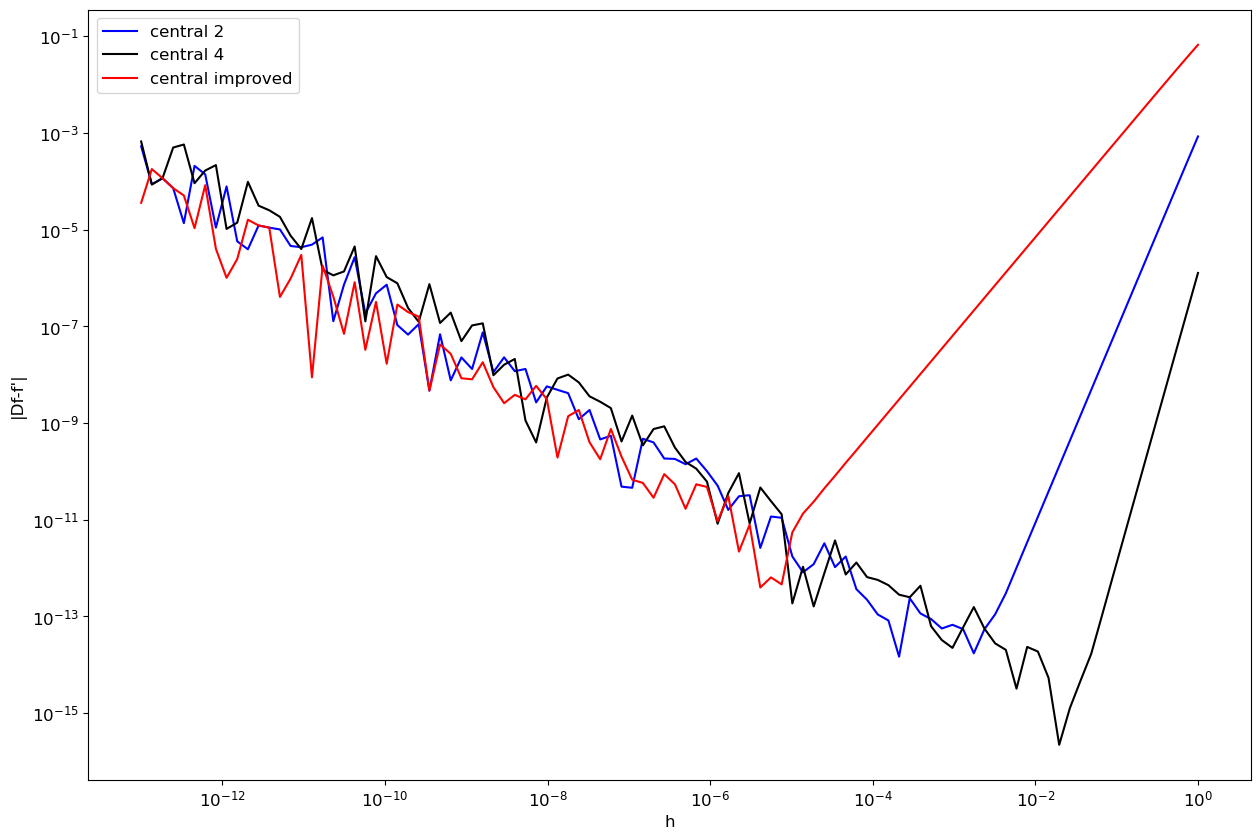

In [21]:

df_central_arr_c_2 = np.array([])
df_central_arr_c_4 = np.array([])

for h in h_arr:
    df2 = 4*der_central_corr(f, x, h/2) - der_central_corr(f, x, h)
    df2 /=3
    df_central_arr_c_2 = np.append(
        df_central_arr_c_2, np.abs(df2-df(x)))
    
    df2_2 = 4*der_central_corr(f, x, h/4) - der_central_corr(f, x, h/2)
    df2_2 /=3
    
    df4 = 16*df2_2 - df2
    df4 /= 15
    df_central_arr_c_4 = np.append(
        df_central_arr_c_4, np.abs(df4-df(x)))
    

plt.figure(figsize=(15, 10))
plt.loglog(h_arr, df_central_arr_c_2, 'b-', label='central 2')
plt.loglog(h_arr, df_central_arr_c_4, 'k-', label='central 4')

plt.loglog(h_arr, df_central_arr_c, 'r-', label='central improved')

plt.xlabel('h')
plt.ylabel('|Df-f\'|')
plt.legend()

# Numerical integration

Quadrature:

$Q^{(N)}=\sum_{k=1}^N\omega_kf(x_k) \rightarrow_{N \rightarrow \infty} I$

defined by nodes and weights approximate an integral $I=\int_a^b \; f(x)dx$.

$I=\sum_{k=1}^N \; I_k$

$I_k=\int_{x_{k-1}}^{x_k} \; f(x)dx \sim Q_k$



## Convergence

Let $Q_k=h\cdot f(x_{k-1})$

$R_k=\int_{x_{k-1}}^{x_k} \; f(x)dx - hf(x_{k-1})=\int_{x_{k-1}}^{x_k} \left(f(x)-f(x_{k-1})\right) dx = \int_{x_{k-1}}^{x_k} \; f'(\xi)(x-x_{k-1})dx = f'(\xi) \int_0^h \; ydy=\frac{1}{2}f'(\xi)h^2$

$R=\sum_k |R_k| \le max_{x \in [a,b]}|f'(x)|h^2N \sim (b-a)h \sim h$

If we assume $Q_k=h*f(x_{k-1/2})$ then $R \sim h^2$

### Trapezoid rule:


$Q_k=\frac{h}{2}(f_{k}+f_{k-1})$

if h is constant

$Q^{(N)}=\frac{1}{2}(f_0+f_N)+\sum_{k=1}^{N-1} f_k$

and $R\sim h^2$

### Simpson's rule:



Main idea - aproximate $f(x)$ on $[x_{k-1},x_k]$ by parabola.

$Q_k=\frac{h}{6}(f_{k}+4f_{k-1/2}+f_{k-1})$

$R \sim h^4$

### A posteriory error bounds:

on each step check $|Q^{(2N)}-Q{(N)}|<\varepsilon$

## Romberg method:

$Q^{(N)}=I+\gamma N^{-2}$

$\rightarrow I_1=\frac{4Q^{(2N)}-Q^{(N)}}{4-1}$


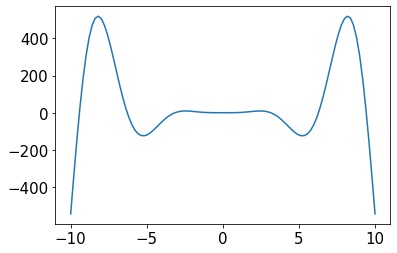

In [4]:
from scipy.integrate import simps


def g(x): return x**3*np.sin(x)
def Ig(x): return 3*(x**2-2)*np.sin(x)-x*(x**2-6)*np.cos(x)


x_grid, h_grid = np.linspace(-10, 10, 100, retstep=True)
plt.plot(x_grid, g(x_grid))

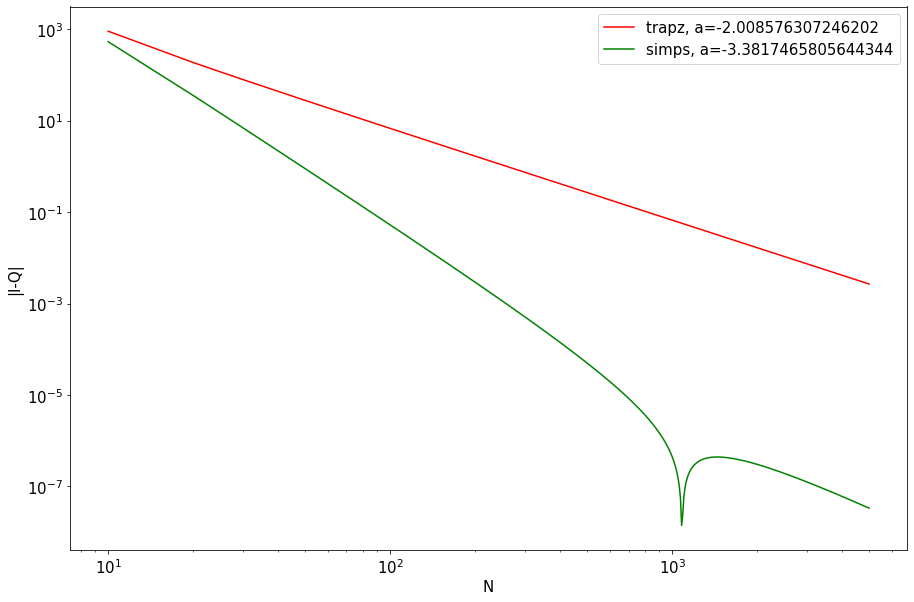

In [5]:
R_I_trapz = np.array([])
R_I_simps = np.array([])

N_test = np.arange(10, 5000, 10)
for N in N_test:
    x_grid, h_grid = np.linspace(-10, 10, N, retstep=True)
    R_I_trapz = np.append(R_I_trapz, np.abs(
        np.trapz(g(x_grid), dx=h_grid)-(Ig(x_grid[-1])-Ig(x_grid[0]))))
    R_I_simps = np.append(R_I_simps, np.abs(
        simps(g(x_grid), x_grid)-(Ig(x_grid[-1])-Ig(x_grid[0]))))


p_trapz = np.polyfit(np.log10(N_test), np.log10(R_I_trapz), 1)
p_simps = np.polyfit(np.log10(N_test), np.log10(R_I_simps), 1)

plt.figure(figsize=(15, 10))
plt.loglog(N_test, R_I_trapz, 'r-', label='trapz, a={}'.format(p_trapz[0]))
plt.loglog(N_test, R_I_simps, 'g-', label='simps, a={}'.format(p_simps[0]))
plt.xlabel('N')
plt.ylabel('|I-Q|')
plt.legend()

# Newton-Cotes formulas

Divide each elementary interval $[x_{k-1},x_k]$ by k equal subintervals $[z_{j-1},z_j]$ and approximate $f(x)$ by an interpolating polynomial of degree k:

$y_j=f(z_j)$

In this case error $R\sim h^{k+1}$.

Method works well if $f(x)$ is locally well approximated by a polynomial.

We can split $f(x)=g(x)\omega(x)$, in this case $I=\int g(x)\omega(x)dx$ where $\omega$ is a weighting function.


# Gaussian quadratures

$I=\int f(x) dx = \int g(x)\omega(x)dx$

Approximate $g(x)$ by polynomial

$Q^{(N)}=\sum_n g_n \omega_n$

$x=\frac{a+b}{2}+\frac{b-a}{2}t$

$\rightarrow I=\int f(x) dx=\frac{b-a}{2}\int_{-1}^{1} f(\frac{a+b}{2}+\frac{b-a}{2}t) dt$

### Let's find a quadrature rule which is exact for polynomial of degree 2n-1:

$\int_{-1}^{1}\phi(t)dt\approx \sum_{i=1}^{N}A_i \phi(t_i)$

$\begin{cases}
\sum_i A_i=2 \\
\sum_i A_i t_i =0 \\
\sum A_i t_i^2 = 2/3 \\
\sum_i A_i t_i^3=0 \\
...\\
\sum_i A_i t_i^{2n-2}=\frac{2}{2n-1}\\
\sum_i A_i t_i^{2n-1}=0
\end{cases}$

### In fact, $t_i$ is the roots of the Legendre polynomial $\eta_n(t)$ and can be founded for all $n$ and localized on the [-1,1]. Weights $A_i$ are integrals of basis Lagrange polynomials $l_i(t)$ of degree $n-1$:

$A_i=\int_{-1}^{1}\frac{(t-t_1)(t-t_2)...(t-t_{i-1})(t-t_{i+1})...(t-t_n)}{(t_i-t_1)(t_i-t_2)...(t_i-t_{i-1})(t_i-t_{i+1})...(t_i-t_n)}dt$

# Gauss-Christoffel quadratures

$\int_a^b p(x) f(x)dx \approx \sum_{i=1}^{N} A_i f(x_i)$

$\omega(x)$ should be continuous and positiove on (a,b)

Let's try to find a family of the orthogonal polynimials $Q_k$:

$\int_a^b p(x) Q_k(x) Q_j(x) dx = \begin{cases} 0, \;\; k=j \\ const\ne 0, \;\; k\ne j \end{cases}$

Roots of the $Q_n$ are chosen to be a nodes in G-C formulas.

## Theorem
G-C formulas are exact for any polynomial up to degree $2n-1$ if nodes are defined as the roots of $Q_n$ and weigths are

$A_i=\int_{-a}^{b}\frac{(t-t_1)(t-t_2)...(t-t_{i-1})(t-t_{i+1})...(t-t_n)}{(t_i-t_1)(t_i-t_2)...(t_i-t_{i-1})(t_i-t_{i+1})...(t_i-t_n)}p(t)dt$

## Example: Gauss-Hermite quadrature

$I=\int_{-\infty}^{\infty} f(x) e^{-x^2}dx = \sum_i^N \omega_i f(x_i)$

The $x_i$ are the roots of the physicists version of the Hermite polynomials $H_n$ and weights are

$\omega_i = \frac{2^{n-1} n! \sqrt{\pi}}{n^2(H_{n-1}(x_i))^2}$

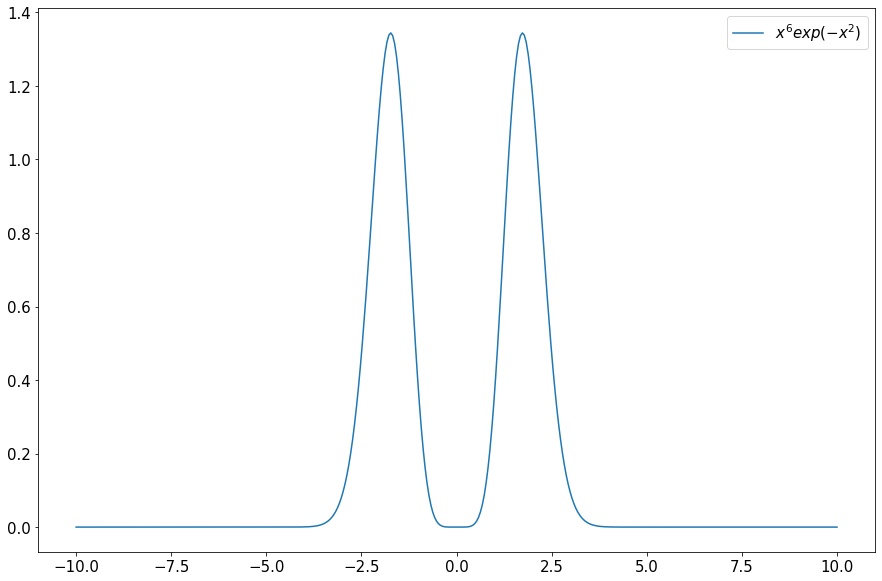

In [39]:
from numpy.polynomial import hermite
x=np.linspace(-10,10,400)
fp = lambda x: x**6*np.exp(-x**2)
f = lambda x: x**6

I_exact=15*np.sqrt(np.pi)/8

plt.figure(figsize=(15,10))
plt.plot(x,fp(x),label='$x^6 exp(-x^2)$')
plt.legend()

In [32]:
R_I_simps=np.array([])
R_I_GH=np.array([])

for n in range(3,50,3):
    x=np.linspace(-6,6,n)
    x_GH, w_GH = hermite.hermgauss(n)
    R_I_simps=np.append(R_I_simps, np.abs(I_exact-simps(fp(x),x)))
    R_I_GH=np.append(R_I_GH, np.abs(I_exact-np.sum(w_GH*f(x_GH))))

Text(0, 0.5, 'residual')

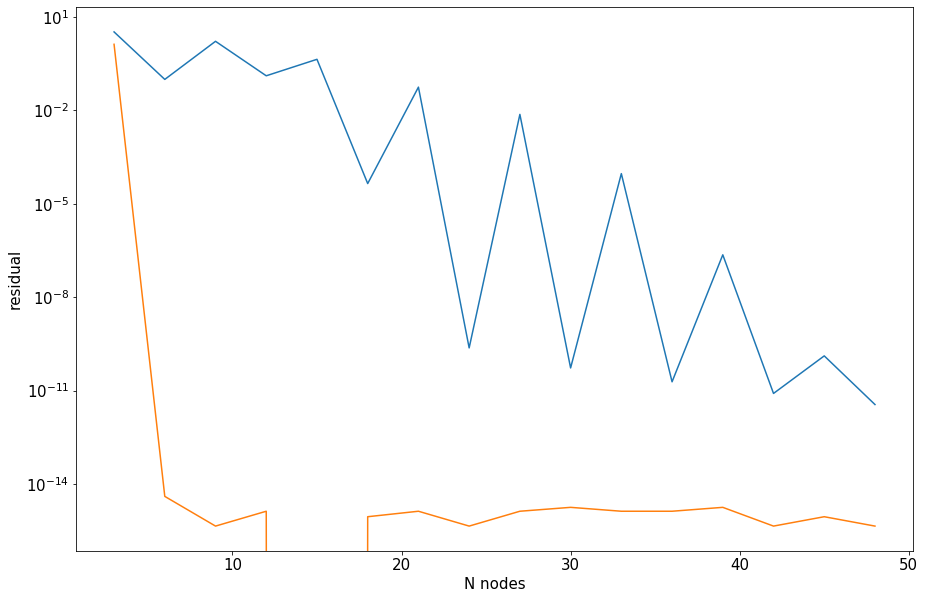

In [36]:
plt.figure(figsize=(15,10))
plt.semilogy(range(3,50,3),R_I_simps)
plt.semilogy(range(3,50,3),R_I_GH)
plt.xlabel('N nodes')
plt.ylabel('residual')